# Sectors - Exploratory Data Analysis

In [1]:
%matplotlib inline

from IPython.core.display import HTML
from IPython.display import Image
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

### Outline: 

**Key Questions: **
 - Can I diversify with Sectors? 
 - How much volatility should I expect? 

** Steps: **
- Collect Data for Sectors, S&P 500 and Treasuries
- Explore the Data
- Explore Return Distributions
- Explore Returns Relations
- Explore Returns Correlations
- TBD

** DISCLAIMER: **

*** This is not a financial advice nor a recommendation. Also I am not qualified to provide financial advice. Just some exploratory data analysis. Use this at your own risk!. ***

### Libraries

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import datetime

sns.set(style="ticks", color_codes=True)
sns.set_context("notebook")


** Let's cache the stuff locally so that Data Provider (ex: Yahoo) don't blacklist our IP Address :-)**

In [2]:
# Creating requests cache. This will store data locally and reuse it.
import requests_cache
expire_after = datetime.timedelta(days=1)
session = requests_cache.CachedSession(cache_name='cache', backend='sqlite', expire_after=expire_after)

### Data Collection

Let's collect data for sectors from **Yahoo**. 

How far back should we collect? For now, let's do 2 years.

In [3]:
# Grab all the closing prices for the Sectors & SPY into one DataFrame

# Set up End and Start times for data grab
sector_list = ['XLY','XLP','XLE','XLF','XLV','XLI', 'XLB', 'XLK', 'XLU' ]
lookback_years = 2 # in years

end = datetime.datetime.now()
start = datetime.datetime(end.year - lookback_years, end.month, end.day)

symbols = sector_list + ['SPY', 'TLT']
close_df = web.DataReader(symbols,'yahoo',start,end, session = session)['Adj Close']
close_df = close_df.round(2)

**Just a quick check that we got the data....**

In [4]:
close_df.tail()

,SPY,TLT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,
2016-07-21,216.27,138.56,48.53,68.11,23.53,58.18,45.56,55.24,52.07,74.84,81.26
2016-07-22,217.24,138.80,48.66,68.32,23.68,58.29,45.83,55.50,52.76,74.99,81.60
2016-07-25,216.65,138.70,48.58,66.96,23.63,57.98,45.77,55.44,52.67,74.91,81.73
2016-07-26,216.75,138.92,48.95,67.35,23.65,58.46,45.87,55.01,52.21,74.78,81.63
2016-07-27,216.52,140.65,49.01,66.69,23.64,58.23,46.25,54.19,51.61,75.12,81.38


** Market Charts**

In [4]:
sns.set_style("darkgrid")

# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(16, 12))
plt.subplot(211)
plt.plot(close_df.SPY)
plt.xlabel("SPY (S&P 500)", fontweight='bold')
plt.ylabel("Price", fontweight='bold')

plt.subplot(212)
plt.plot(close_df.TLT)
plt.xlabel("TLT (Treasuries)", fontweight='bold')
plt.ylabel("Price", fontweight='bold')

df2 = close_df[sector_list]
df2.plot(figsize=(16, 18), subplots=True, layout=(5,3)) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C9A91D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D5B6668>]], dtype=object)

** Let's convert the data into percent returns. **

*Note: periods=1 means daily returns. That is the default. *

In [7]:
# Let's get the returns in percent changes
close_rets = close_df.pct_change(periods=1)
close_rets = close_rets.dropna()
close_rets.tail()

,SPY,TLT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,
2016-07-15,-0.001342,-0.008597,0.003497,-0.000577,-0.001698,-0.000170,-0.000888,0.000000,0.002893,-0.000809,-0.004426
2016-07-18,0.002687,-0.000939,0.006560,0.000722,0.003401,-0.000852,0.006665,-0.001077,0.002885,0.000405,0.003828
2016-07-19,-0.001017,0.005642,-0.005906,-0.005629,0.000424,0.000512,-0.002207,-0.000719,-0.001726,-0.002159,-0.001845
2016-07-20,0.004163,-0.005466,0.000410,-0.001452,0.001694,0.001875,0.013050,-0.003597,-0.005763,0.009060,0.004190
2016-07-21,-0.003777,0.002025,-0.006144,-0.009885,-0.005074,-0.010208,-0.005240,-0.002888,0.005989,0.002948,-0.002700


### Understanding Sector Returns Distribution

Following is a brief description of the next three charts...

** Swarm Plot**

A swarm plot shows all observations along with some representation of the underlying distribution. It can be drawn on its own, or as a complement to a box or violin plot.

**Box-Whisker Plot**

Let’s say we ask 2,852 people (and they miraculously all respond) how many hamburgers they’ve consumed in the past week. We’ll sort those responses from least to greatest and then graph them with our box-and-whisker.

Take the top 50% of the group (1,426) who ate more hamburgers; they are represented by everything above the median (the white line). Those in the top 25% of hamburger eating (713) are shown by the top “whisker” and dots. 

***Outliers*** - Dots represent those who ate a lot more than normal or a lot less than normal (outliers).

***Finding Skews in Data*** - The box-and-whisker of course shows you more than just four split groups. You can also see which way the data sways. For example, if there are more people who eat a lot of burgers than eat a few, the median is going to be higher or the top whisker could be longer than the bottom one. Basically, it gives you a good overview of the data’s distribution.

**Violin Plot**

Violin plot is similar to box plot like above except that it shows probablity density of the data at different values. In other words, the width of the body is an indication of how often the daily net returns of underlying symbol will be in that region. 

The length of the body is an indication of the range of daily net returns to expect and what daily return would constitute to be an outlier return. Right side of the vertical line represents postive returns. Left side for negative returns. 

There is much more info in this plot. If interested, read up about **violin_plots** on the net.


In [8]:
#Image(url="http://i1.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif")

C:\Users\durga\Anaconda2\lib\site-packages\seaborn\categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


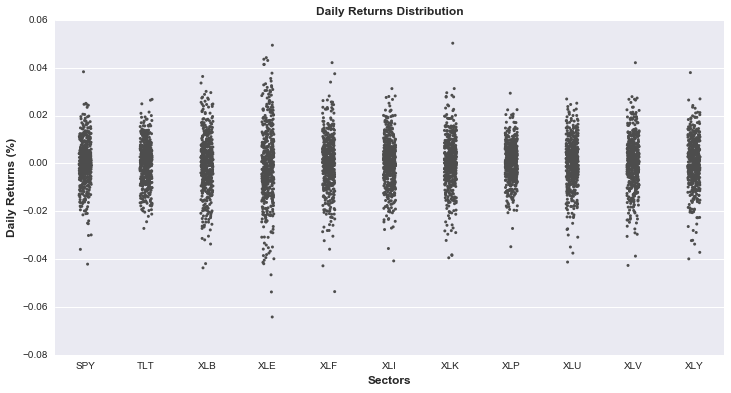

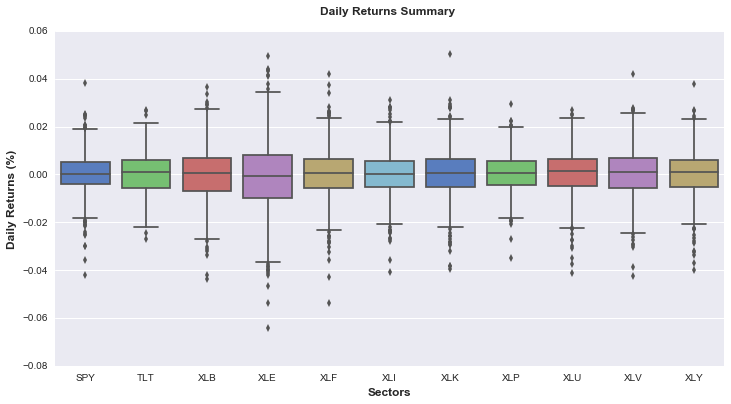

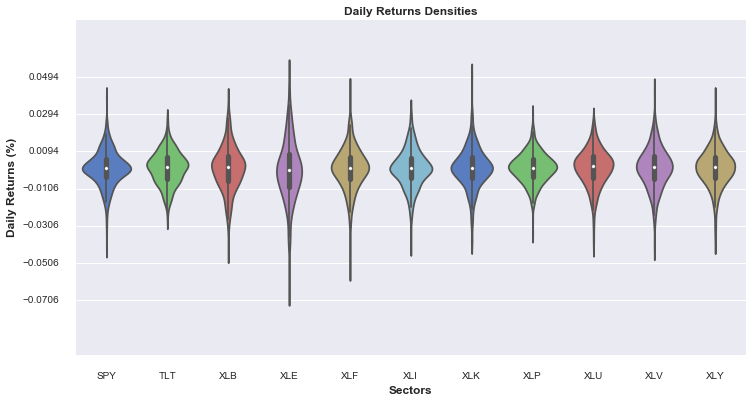

In [9]:
sns.set_style("darkgrid")

# Swarm Plot
plt.figure(figsize=(12,6))
g1 = sns.stripplot(data=close_rets, jitter=True, size=3, color=".3", linewidth=0)
g1.set_xlabel('Sectors', fontweight='bold', fontsize=12)
g1.set_ylabel('Daily Returns (%)', fontweight='bold', fontsize=12)
g1.set_title("Daily Returns Distribution", fontweight='bold', fontsize=12)
#g.set_yticks(np.arange(np.min(close_rets).min()*1.5, np.max(close_rets).max()*1.5, 0.01))

# Box-Whiskers Plot
plt.figure(figsize=(12,6))
g2=sns.boxplot(close_rets, palette="muted")
g2.set_xlabel('Sectors', fontweight='bold', fontsize=12)
g2.set_ylabel('Daily Returns (%)', fontweight='bold', fontsize=12)
g2.set_title("Daily Returns Summary \n ", fontweight='bold', fontsize=12)

# Violin Plot
plt.figure(figsize=(12,6))
g3 = sns.violinplot(data=close_rets, palette="muted", split=True)
g3.set_xlabel('Sectors', fontweight='bold', fontsize=12)
g3.set_ylabel('Daily Returns (%)', fontweight='bold', fontsize=12)
g3.set_title("Daily Returns Densities", fontweight='bold', fontsize=12)
g3.set_yticks(np.arange(np.min(close_rets).min()*1.1, np.max(close_rets).max()*1.1, 0.02))

sns.despine(offset=10, trim=True);

### Understanding Sector Correlations

Let's see how our Sectors, S&P 500 and Treasuries correlate...

** Let's compute the correlations and see correlation map...**

In [10]:
df_corr = close_rets.corr(min_periods=12)
df_corr

,SPY,TLT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
SPY,1.000000,-0.428532,0.842390,0.726648,0.922078,0.930024,0.934326,0.814829,0.479928,0.849761,0.920316
TLT,-0.428532,1.000000,-0.410165,-0.364557,-0.495629,-0.420179,-0.399128,-0.262382,0.114109,-0.312921,-0.408214
XLB,0.842390,-0.410165,1.000000,0.783396,0.776487,0.849116,0.737499,0.619836,0.352280,0.645842,0.720693
XLE,0.726648,-0.364557,0.783396,1.000000,0.634824,0.692411,0.603357,0.464633,0.307493,0.509107,0.597369
XLF,0.922078,-0.495629,0.776487,0.634824,1.000000,0.867177,0.831130,0.713360,0.351918,0.744191,0.837685
XLI,0.930024,-0.420179,0.849116,0.692411,0.867177,1.000000,0.848589,0.733538,0.429779,0.732020,0.836661
XLK,0.934326,-0.399128,0.737499,0.603357,0.831130,0.848589,1.000000,0.731682,0.395863,0.759113,0.862904
XLP,0.814829,-0.262382,0.619836,0.464633,0.713360,0.733538,0.731682,1.000000,0.615666,0.678141,0.751880
XLU,0.479928,0.114109,0.352280,0.307493,0.351918,0.429779,0.395863,0.615666,1.000000,0.385092,0.397686
XLV,0.849761,-0.312921,0.645842,0.509107,0.744191,0.732020,0.759113,0.678141,0.385092,1.000000,0.767207


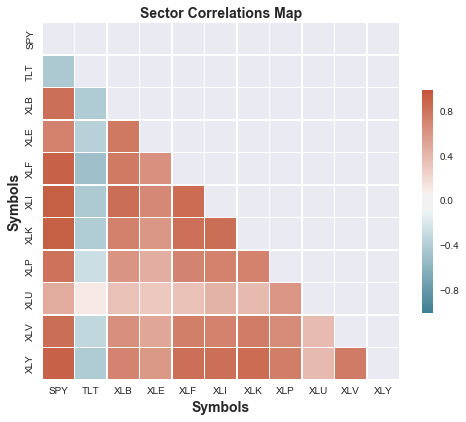

In [11]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(df_corr.dropna(), mask=mask, cmap=cmap,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax )

g.set_xlabel('Symbols', fontweight='bold', fontsize=14)
g.set_ylabel('Symbols', fontweight='bold', fontsize=14)
g.set_title("Sector Correlations Map", fontweight='bold', fontsize=14)

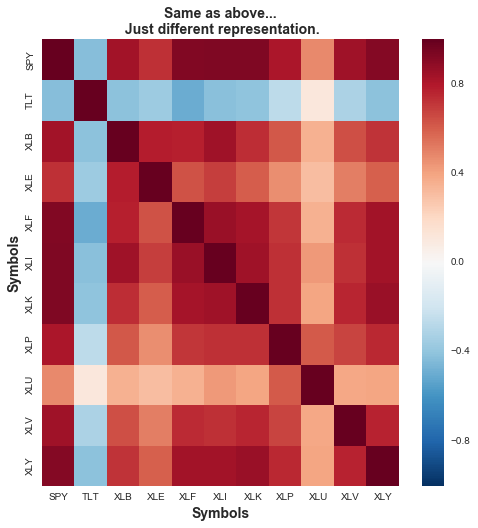

In [12]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
g = sns.heatmap(df_corr, square=False)

g.set_xlabel('Symbols', fontweight='bold', fontsize=14)
g.set_ylabel('Symbols', fontweight='bold', fontsize=14)
g.set_title("Same as above...\n Just different representation.", fontweight='bold', fontsize=14)

Obvious relations are -
- **Treasuries** and **S&P500** are negatively correlated. 
- Most Sectors are positively correlated in their returns.
- Most Sectors are positively correlated with S&P 500 in returns.

Can you see more relations?

In next section, let's dive deeper and see data behind the above simplified correlation map.

### How are Correlations last 2 years?

In [13]:
Image(url= "http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg")

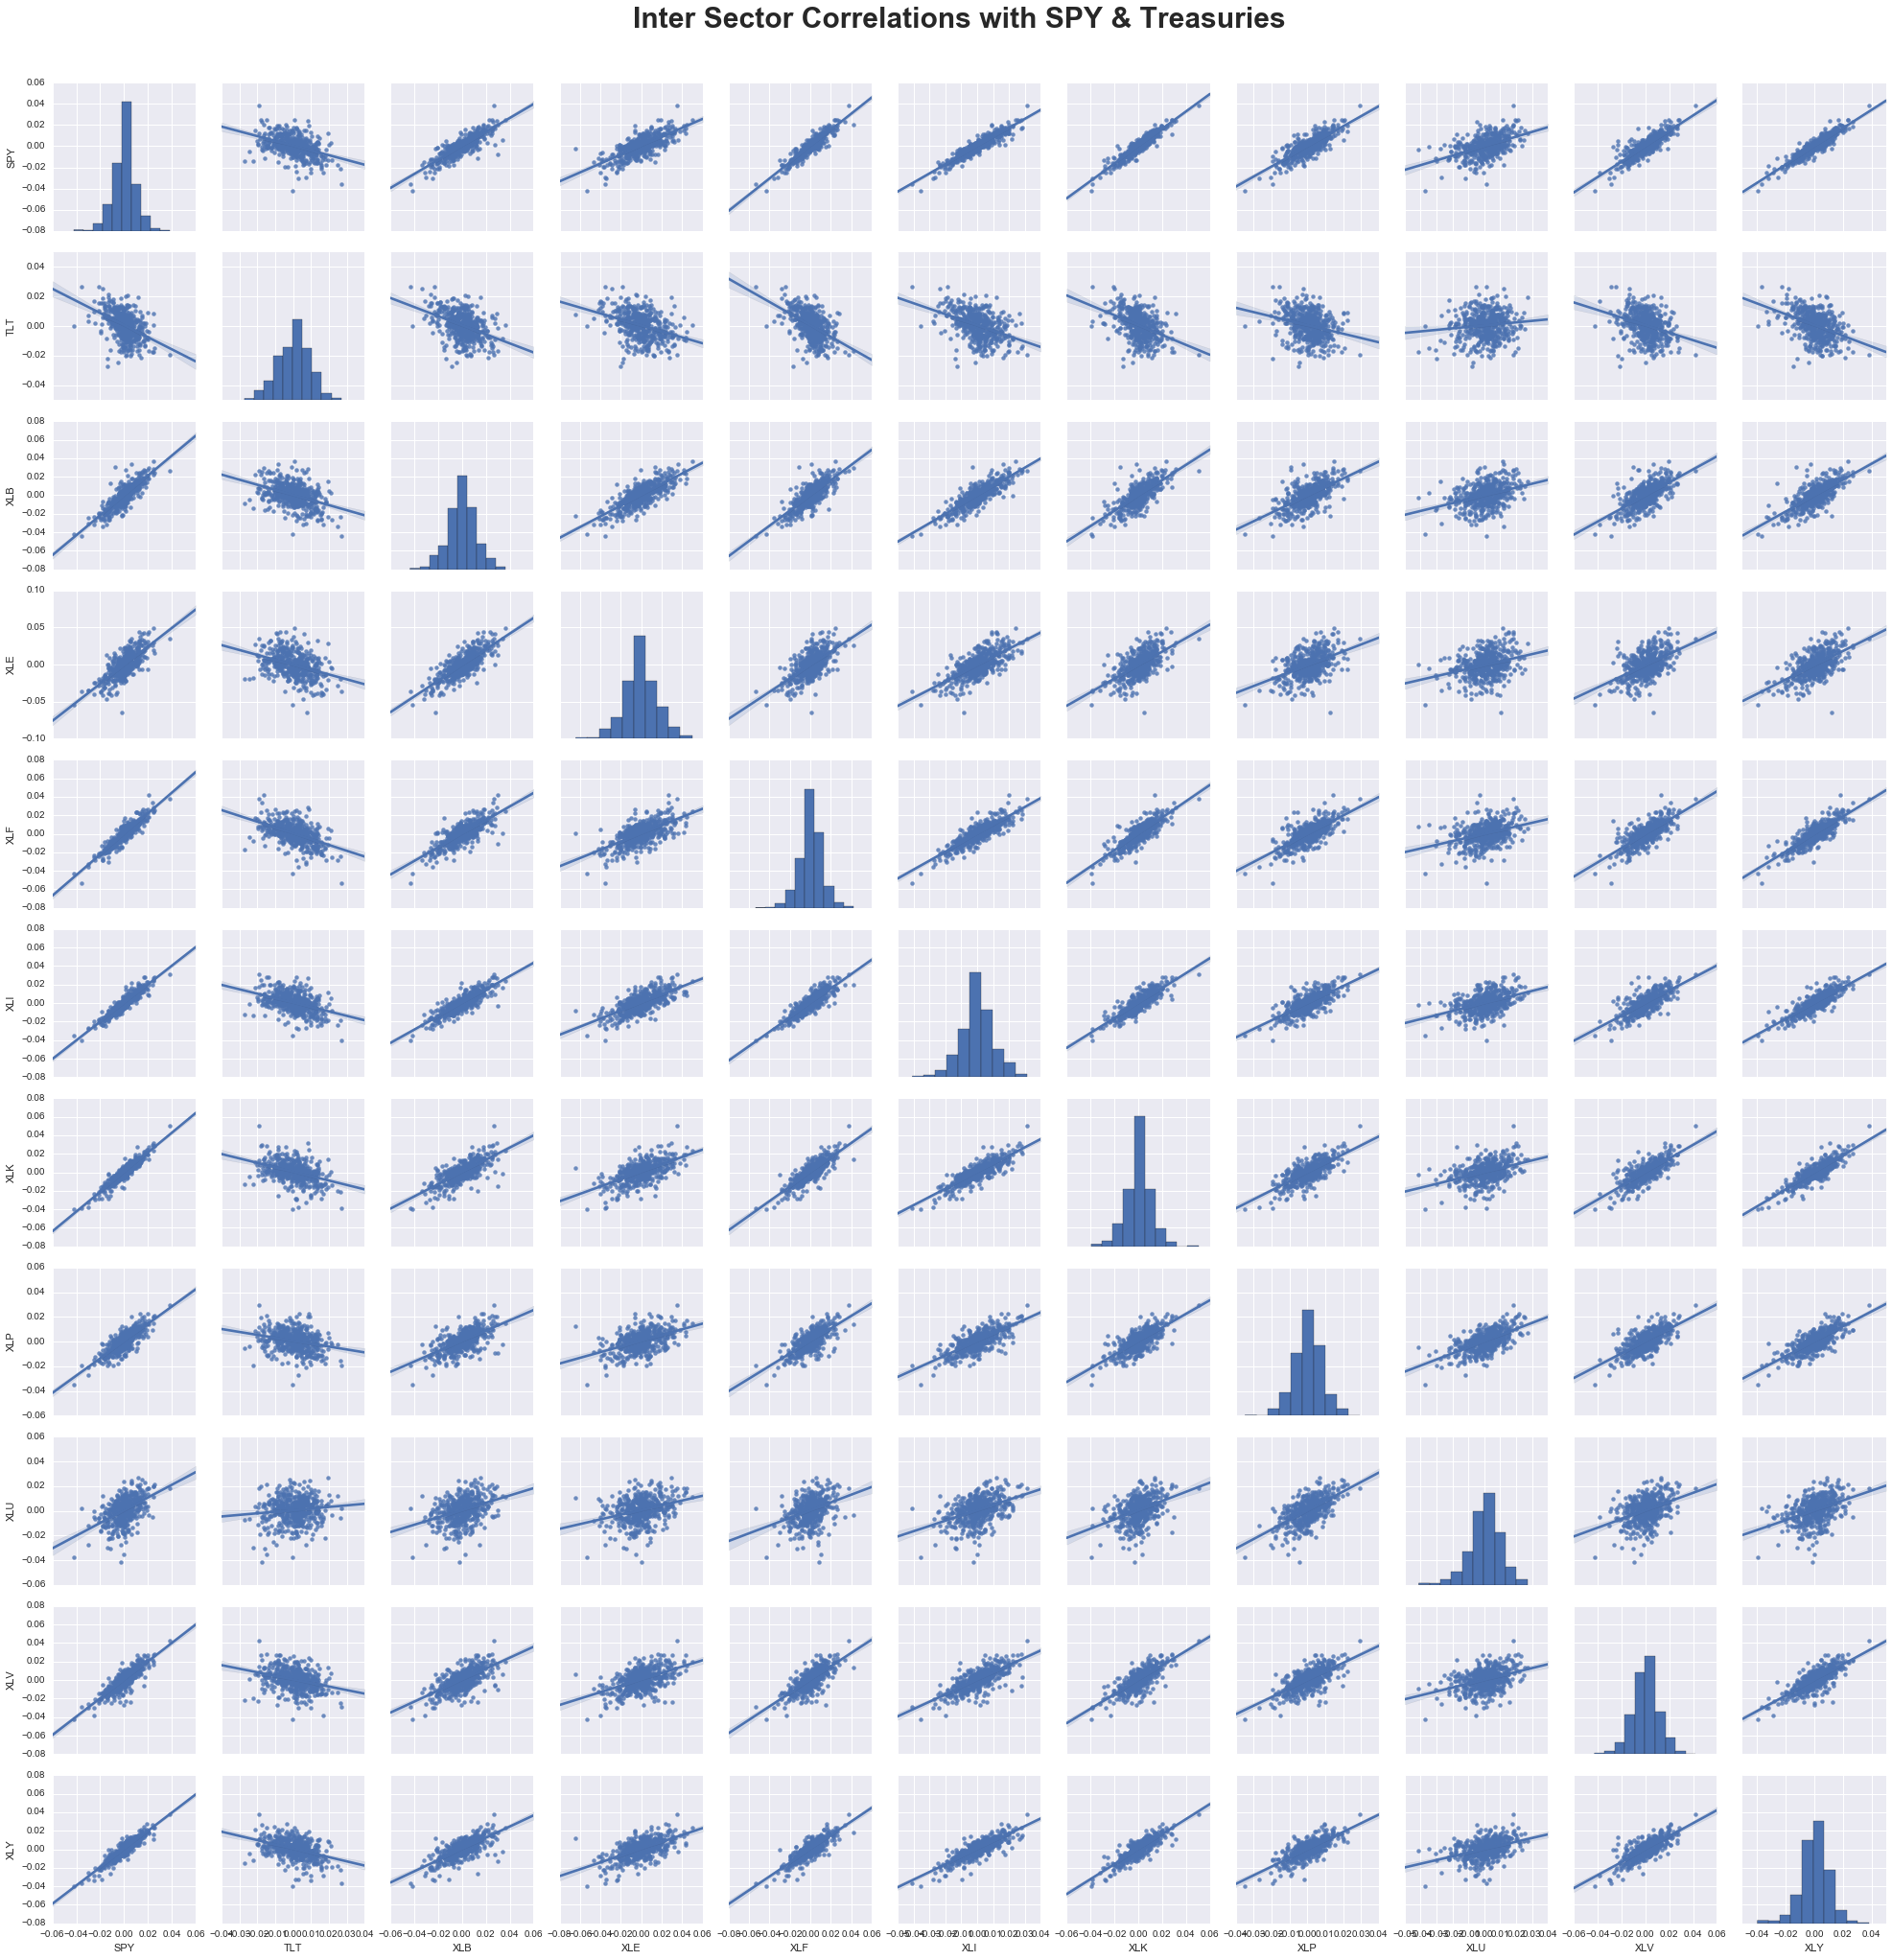

In [14]:
# Inter Sector Correlations
g = sns.pairplot(close_rets, kind='reg')
g.fig.text(0.33, 1.02,'Inter Sector Correlations with SPY & Treasuries', fontsize=30, fontweight='bold')

Too bad. Most of the sectors returns are pretty correlated. 

** Utilites (XLU) ** is an interesting one. It is less correlated with other sectors in general. 

** Treasuries (TLT) ** has low correlation in recent years with S&P or Sectors. 

** S&P 500 and Sectors ** more or less fairly correlated.

** Energy (XLE) & Financials (XLF) ** are also interesting. If you see their histograms, XLF is pretty compressed and tall. It basically means, a high concentration of its daily returns are near zero i.e., highly efficient price discovery by market. I guess that is expected.

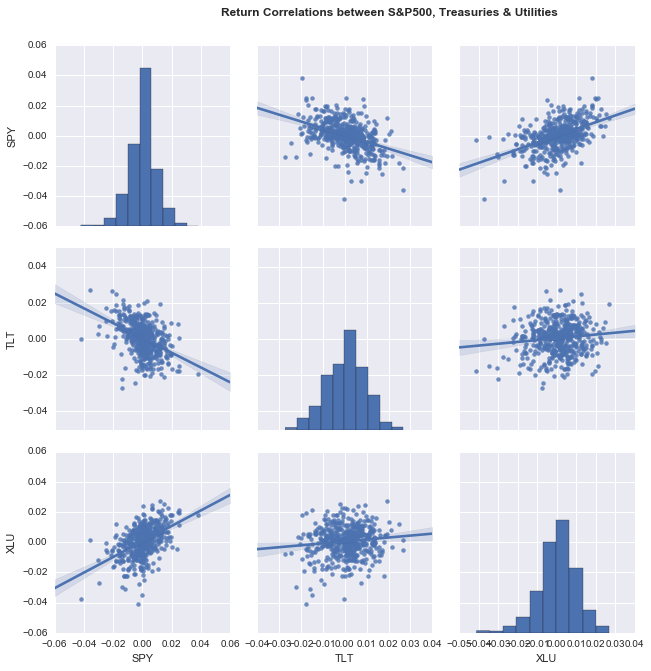

In [15]:
g = sns.pairplot(close_rets, size=3,vars=["SPY", "TLT", "XLU"], kind='reg')
g.fig.text(0.33, 1.02,'Return Correlations between S&P500, Treasuries & Utilities', fontweight='bold')

*Can you see the building blocks for a system :-) *


### Cluster Map

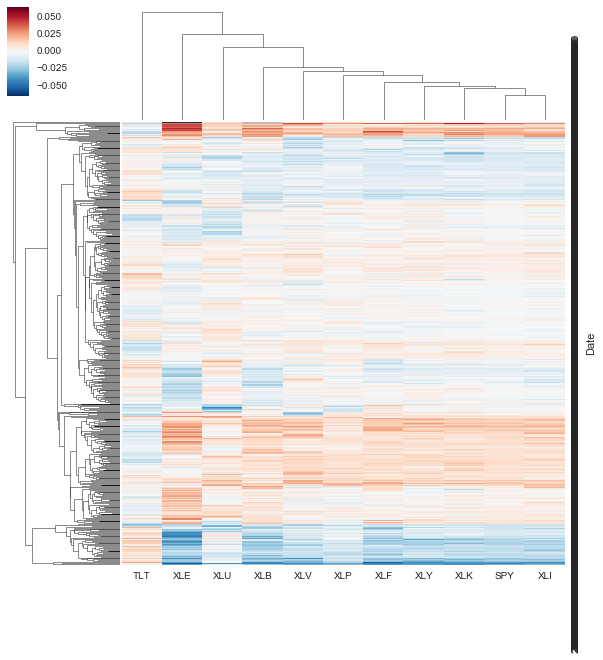

In [16]:
sns.clustermap(close_rets, col_cluster=True)

What do you see?

Play around...